In [1]:
from tweepy import OAuthHandler
from tweepy import Stream
from tweepy.streaming import StreamListener
import time

In [2]:
# setup security 
access_token = '113022519-8jPwbeaAMgeqV1V8xd3WGwUqZiYkzp9oxjjql3NF'
access_token_secret = 'PxMBoxGIoLF5y5sLxchmlPVbGTqZmO5RIiIT9Jog7Y6YB'
consumer_key = 'mcGRiQDiKiIGoLafZEkOAgR1D'
consumer_secret = 'JQXi0uoA0vba5uHr4NyCUDMcEPYqayihb2OMMd3vfhHc0bLrJc'

# setup file store
file = 'C:\\RIWRS\\teste.json'

In [3]:
class MyListener(StreamListener):
        
    
    def __init__(self, file):
        global the_file
        self.the_file = open(file, 'w')
        
    def on_data(self, data):
        self.the_file.write(data)
        return True
    
    def on_error(self, status):
        print(status)
        
    def file_close(self):
        self.the_file.close()

In [4]:
listener = MyListener(file)
oauth = OAuthHandler(consumer_key, consumer_secret)
oauth.set_access_token(access_token, access_token_secret)

max_time = 10 # in seconds
start_time = time.time() 

## collecting...
stream = Stream(oauth, listener)
#stream.filter(track=['copa', 'neymar', 'messi'],async=True,languages=['pt'])
stream.filter(track=['espanha', 'ira', 'critiano ronaldo'],async=True)

elapsed_time = (time.time() - start_time)
while  elapsed_time < max_time:
    elapsed_time = (time.time() - start_time)

    
print('**Finish**')
stream.disconnect()
listener.file_close()

**Finish**


In [5]:
import json
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
tweets_data = []
tweets_file = open(file, "r")
for line in tweets_file:
    try:
        tweet = json.loads(line)
        tweets_data.append(tweet)
    except:
        continue

In [7]:
tweets = pd.DataFrame()

tweets['lang'] = ''
tweets['text'] = ''
tweets['country'] = ''
for tweet in tweets_data:
    if 'lang' in tweet:
        tweets.loc[len(tweets)] = [tweet['lang'],
                               tweet['text'],
                               tweet['place']['country'] if tweet['place'] != None else None]
    
print(tweets.head(30))

   lang                                               text country
0    pt        Meu deus a Espanha vai me causar um infarto    None
1    pt  Msm provavelmente eliminados tao jogando mt be...    None
2    pt  Jesus amado eu amo a #Copa2018 Portugal atacan...    None
3    pt  RT @kcestrabao: KKKKKKKKKKKKKKKKKKKKKKKKKKKKKK...    None
4    pt  RT @CACCST: Paula Amorim e Breno Simões irá se...    None
5    pt            eu não tô pronto pra ver Espanha perder    None
6    pt  RT @CuriosidadesEU: Isco com a camisa da Espan...    None
7    pt  Em andamento:\n\n🇪🇸 ESP 1x1 MAR 🇲🇦\n🇮🇷 I...    None
8    pt  Paraguaio Enrique Cáceres em Irã x Portugal.\n...    None
9    pt  RT @calhau: Se Alemanha e Espanha se enfrentam...    None
10   pt   AAAAAAAAAA \nQuero ver Espanha e Marrocos também    None
11   fr  Par contre les mecs qui s'appellent "bb" vous ...    None
12   pt  RT @RodFerreiraBFR: Marrocos x Espanha tá um j...    None
13   pt                          Espanha acabou de empatar    None
1

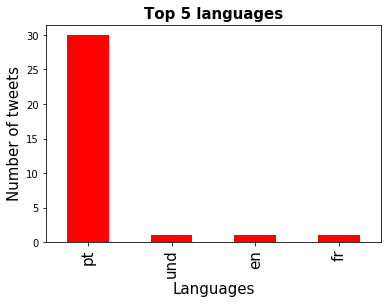

In [8]:
tweets_by_lang = tweets['lang'].value_counts()

fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Languages', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Top 5 languages', fontsize=15, fontweight='bold')
tweets_by_lang[:5].plot(ax=ax, kind='bar', color='red')